# Natural Language Processing Project

In this NLP project we will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

## Imports

In [1]:
import pandas as pd
import nltk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## The Data

In [2]:
yelp = pd.read_csv('yelp.csv')

** Info about the data set **

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**We will create a new column called "text length" which is the number of words in the text column.**

In [6]:
yelp['text_length'] = yelp['text'].apply(len)

In [7]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


In [8]:
yelp['text'].iloc[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

# Exploratory Data Analysis

**We will use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings. **

C:\Users\p.gkoulemas\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


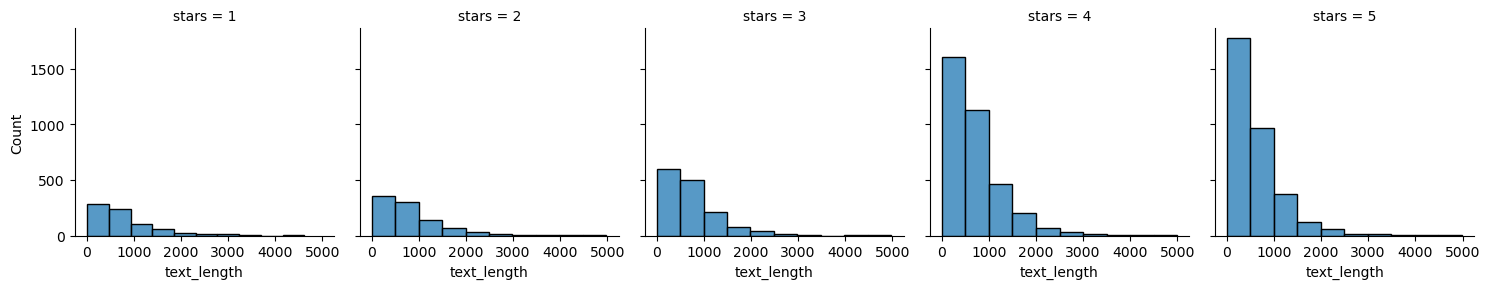

In [9]:
g= sns.FacetGrid(yelp, col= 'stars')
g.map_dataframe(sns.histplot, x= 'text_length', bins= 10)
g.tight_layout()

**A boxplot of text length for each star category.**

<Axes: xlabel='stars', ylabel='text_length'>

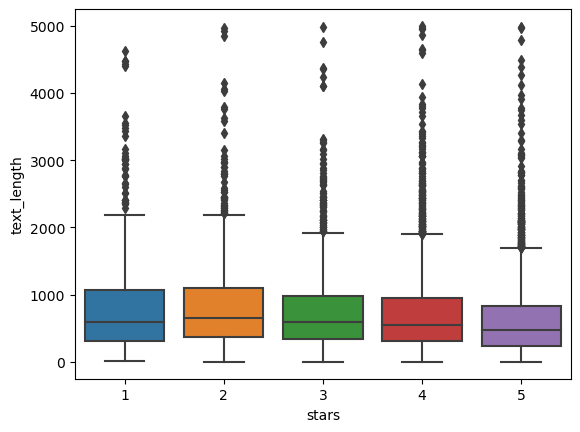

In [10]:
sns.boxplot(yelp, x= 'stars', y= 'text_length')

**A countplot of the number of occurrences for each type of star rating.**

<Axes: xlabel='stars', ylabel='count'>

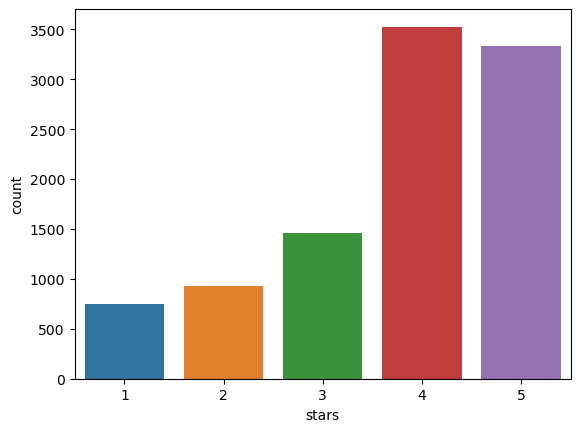

In [11]:
sns.countplot(yelp, x= 'stars')

** We will groupby the number of stars to get the mean values of the numerical columns **

In [12]:
yelp.groupby('stars').mean(numeric_only = True)

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


**We will use the corr() method on that groupby dataframe: **

In [13]:
yelp.groupby('stars').mean(numeric_only = True).corr()

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_length,-0.857664,0.699881,0.843461,1.000000


**Then we will create a heatmap based off that .corr() dataframe:**

<Axes: >

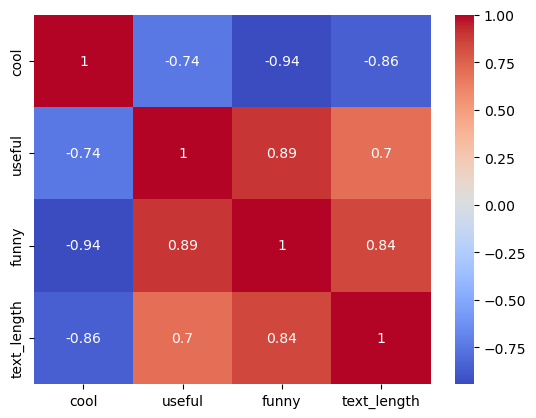

In [14]:
sns.heatmap(yelp.groupby('stars').mean(numeric_only = True).corr(), cmap= 'coolwarm', annot= True)

## NLP Classification 

We will only grab reviews that were either 1 star or 5 stars.

**So we will create a dataframe that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [15]:
yelp_class =yelp[(yelp['stars']== 1) | (yelp['stars']== 5)]

In [16]:
yelp_class.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


In [17]:
yelp_class['stars'].value_counts()

stars
5    3337
1     749
Name: count, dtype: int64

** We will create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. **

In [18]:
#Features
X= yelp_class['text']
#Targets
y= yelp_class['stars']

**We will import CountVectorizer and create a CountVectorizer object.**

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
bow_transformer = CountVectorizer()

** Then we'll use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column) and save this result by overwriting X.**

In [21]:
X = bow_transformer.fit_transform(X)

## Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=101)

## Training a Model

** We will import MultinomialNB and create an instance of the estimator **

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
nb = MultinomialNB()

**Now we'll fit nb using the training data.**

In [26]:
nb.fit(X_train, y_train)

MultinomialNB()

## Predictions and Evaluations

**We will use the predict method off of nb to predict labels from X_test.**

In [27]:
predictions= nb.predict(X_test)

** The evaluation follows. **

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



**That's some generally satisfying results!**

# Using Text Processing

** We want now to use a TF-IDF Trasformer to test for better results **

In [30]:
from sklearn.feature_extraction.text import TfidfTransformer

** We will use Pipeline from sklearn. **

In [31]:
from sklearn.pipeline import Pipeline

** We will create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [32]:
pipeline = Pipeline([
    #string to token integer counts
    ('bow', CountVectorizer()),
    #integer counts to weighted TF-IDF scores
    ('tfidf', TfidfTransformer()),
    #train on TF-IDF vectorS With Naive Bayes Classifier
    ('classifier', MultinomialNB())
])

## Using the Pipeline

### Train Test Split

In [33]:
X= yelp_class['text']
y= yelp_class['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=101)

**Now we will fit the pipeline to the training data.**

In [34]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

### Predictions and Evaluation

** Now we will use the pipeline to predict from the X_test and create a classification report and confusion matrix. **

In [35]:
all_predictions = pipeline.predict(X_test)

In [36]:
print(confusion_matrix(y_test, all_predictions))
print('\n')
print(classification_report(y_test, all_predictions))

[[  0 228]
 [  0 998]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\Users\p.gkoulemas\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\p.gkoulemas\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\p.gkoulemas\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

**Looks like Tf-Idf actually made things worse!**

## With custom analyzer for vectorization and without TF-IDF Transformer

** We will do the same process with a custom analyzer in CountVectorizer() and remove the TF-IDF Transformer from the pipeline **

In [37]:
from nltk.corpus import stopwords
import string

In [38]:
#Custom Analyzer
def clean_text(text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """

    text= text.split(" ")
    new_text= []
    
    for word in text:
        for char in word:
            if char in string.punctuation:
                word= word.replace(char,"")
        if word.lower() not in stopwords.words('english'):
            new_text.append(word)
            
    return new_text

In [39]:
n_pipeline = Pipeline([
    #string to token integer counts
    ('bow', CountVectorizer(analyzer= clean_text)),
    #train vectors With Naive Bayes Classifier
    ('classifier', MultinomialNB())
])

In [40]:
X= yelp_class['text']
y= yelp_class['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=101)

In [41]:
#Might take a while
n_pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function clean_text at 0x00000197B5D87560>)),
                ('classifier', MultinomialNB())])

In [42]:
n_predictions = n_pipeline.predict(X_test)

In [43]:
print(confusion_matrix(y_test, n_predictions))
print('\n')
print(classification_report(y_test, n_predictions))

[[126 102]
 [  7 991]]


              precision    recall  f1-score   support

           1       0.95      0.55      0.70       228
           5       0.91      0.99      0.95       998

    accuracy                           0.91      1226
   macro avg       0.93      0.77      0.82      1226
weighted avg       0.91      0.91      0.90      1226



**We observe a similar performance to the first case (with the default analyzer and no TD-IDF Transformer)**

## With custom analyzer and TD-IDF transformer

In [44]:
n1_pipeline = Pipeline([
    #string to token integer counts
    ('bow', CountVectorizer(analyzer= clean_text)),
    #integer counts to weighted TF-IDF scores
    ('tfidf', TfidfTransformer()),
    #train on TF-IDF vectorS With Naive Bayes Classifier
    ('classifier', MultinomialNB())
])

In [45]:
X= yelp_class['text']
y= yelp_class['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=101)

In [46]:
#Might take a while
n1_pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function clean_text at 0x00000197B5D87560>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [47]:
n1_predictions = n1_pipeline.predict(X_test)

In [48]:
print(confusion_matrix(y_test, n1_predictions))
print('\n')
print(classification_report(y_test, n1_predictions))

[[  0 228]
 [  0 998]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\Users\p.gkoulemas\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\p.gkoulemas\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\p.gkoulemas\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

**We observe the same performance with the previous use of the TD-IDF Tranformer. So using a custom analyzer seems not to affect the results. 
Maybe a different Classifier?**